**문제** :: 다양한 분류 알고리즘으로 럭키백의 확률을 계산~~

# 로지스틱 회귀

In [26]:
import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [27]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [28]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height',"Width"]].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [29]:
fish_target = fish['Species'].to_numpy()

In [30]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( fish_input, fish_target,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

K-최근접 이웃 분류기의 확률 예측

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


**다중 분류** : 타깃데이터에 2개 이상의 클래스가 포함된 문제

In [33]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [34]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


**로지스틱 회귀** : 회귀라고 불리지만 분류모델
<br><br>
&nbsp; $z = a \times (Weight) + b \times (Lenght) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$
<br><br>
z가 아주 큰 음수일떄 0, 아주 큰 양수 일때 1이 되도록 바꿀려면, **시그모이드 함수(또는 로지스틱 함수)**

**시그노이드 함수** : 결과 값을 확률값으로 변환하는데 사용


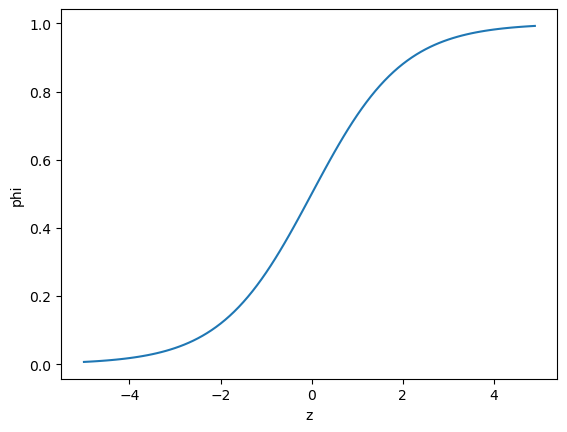

In [35]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()#시그노이드 함수 그래프

In [36]:
#로지스틱 회귀로 이진 분류 수행하기
#불리언 인뎃싱 : 참, 거짓 값을 전달 하여 행을 선택
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [37]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
#bream_smelt_indexes 배열은 도미와 빙어 일 경우 참이고, 그 외의 모두 거짓값이 들어간다.

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt)[:5]) # 예측 값
print(lr.predict_proba(train_bream_smelt)[:5]) # 첫번째 열: 음성클래스에 대한 확률, 두번째 : 양성 클래스에 대한 확륙
print(lr.classes_)#빙어(smelt)가 양성 클래스

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']


In [39]:
decisions = lr.decision_function(train_bream_smelt[:5])
from scipy.special import expit
print(expit(decisions)) # lr.predict_proba의 두번째 열과 같음 즉, 양성 클래스에 대한 z값 반환

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


**로지스틱 회귀로 다중 분류 수행하기**<br>
L2 규제 : 계수를 줄이는, alpha와 반대로 C는 작을수록 규제가 크다.

In [40]:
lr = LogisticRegression(C = 20, max_iter = 10000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [41]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [42]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [43]:
print(lr.classes_)


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [44]:
print(lr.coef_.shape,lr.intercept_.shape)

(7, 5) (7,)


In [45]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[-6.03  3.57 -5.27 -4.24 -6.06]


In [46]:
from scipy.special import softmax
proba = softmax(decision, axis =1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 경사 하강법

**점진적 학습**(온라인 학습)
* 확률적 경사 하강법 : 한개씩 꺼내 학습
* 미니배치 경사 하강법 : 여러개씩 꺼내 학습
* 배치 경사 하강법 : 몽땅 꺼내 학습

**손실 함수** : 머신러닝 알고리즘이 얼마나 부적합한지 측정하는 기준(어떤 값이 최소값인지는 알수없음)
* 로지스틱 손실 함수(이진 크로스엔트로피 손실함수) : 이진 분류
* 크로스엔트로피 손실 함수 : 다중 분류
* 평균제곱의 오차 : 회귀

In [47]:
#SGDClassifier
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height',"Width"]].to_numpy()
fish_target = fish['Species'].to_numpy()

In [48]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [50]:
from sklearn.linear_model import SGDClassifier #객체를 만들때 2개의 매개변수를 지정

In [51]:
#loss = 로지스틱 손실 함수 지정, max_iter=수행할 에포크 횟수
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#

0.7899159663865546
0.775


/Users/bagso-eun/miniconda3/envs/hongong/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [52]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#에포크를 한번 더 실해하니 정확도가 향상됨, 하지만 아직 작음
#계속이렇게 반복하긴 번거로우니 어떤 기준이 필요 할거 같음

0.8067226890756303
0.8


**에포크와 과대/과소 접합**<br>
테스트 세트가 감소하기 전 즉 과대적합이 시작하기 전 훈련을 멈추는 것 : **조기 종료**

In [53]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) ##집합처럼 리스트에 있는 값의 중복을 없앤 즉, 고유의 값만 들고와서 보여주는 그런거군랙

In [54]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

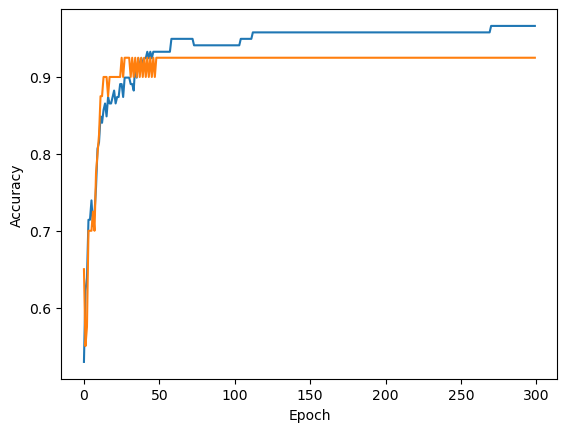

In [55]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
# 점점 더 벌어지고 잇음~~

In [60]:
sc =SGDClassifier(loss='log_loss', max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
#tol 매개변수에서 향상될 최솟값을 지정, 이 코드에서는 tol매개변수를 None으로 지정하여 자졷으로 멈추지 않고 max_iter=100만큼 무조건 반복함

0.957983193277311
0.925


**SGDClassifier**의 loss 매개변수
https://scikit-learn.org/1.6/modules/generated/sklearn.linear_model.SGDClassifier.html
* default : hinge (&nbsp;*힌지손실(서포트 백터 머신)* )

In [61]:
sc= SGDClassifier(loss='log_loss',max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
